# Análise das hipóteses da pergunta 3

O primeiro passo para essa análise é o carregamento dos dados já obtidos e organizados nas fases iniciais de análise.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

redlist_df = pd.read_csv("../../clean-redlist.csv")
redlist_df

,Unnamed: 0,scientificName,redlistCategory,populationTrend,systems,realm,possiblyExtinct,possiblyExtinctInTheWild,longitude,latitude
0,0,Hexanchus griseus,Near Threatened,Decreasing,Marine,NaN,False,False,NaN,NaN
1,1,Heosemys annandalii,Critically Endangered,Decreasing,Terrestrial|Freshwater (=Inland waters),Indomalayan,False,False,NaN,NaN
2,2,Hubbsina turneri,Critically Endangered,Decreasing,Freshwater (=Inland waters),Neotropical,False,False,"[-101.4795, -101.7773, -101.7876]","[19.8745, 19.8256, 19.8273]"
3,3,Hungerfordia pelewensis,Endangered,Unknown,Terrestrial,Oceanian,False,False,NaN,NaN
4,4,Ictalurus mexicanus,Vulnerable,Unknown,Freshwater (=Inland waters),Neotropical,False,False,"[-99.35417, -99.3]","[21.98083, 22.0]"
...,...,...,...,...,...,...,...,...,...,...
50245,50245,Filicium thouarsianum,Near Threatened,Decreasing,Terrestrial,Afrotropical,False,False,"[49.13333, 49.066667, 49.13333, 49.13333, 47.7...","[-18.81666, -18.866667, -18.81666, -18.81666, ..."
50246,50246,Melanophylla angustior,Endangered,Decreasing,Terrestrial,Afrotropical,False,False,"[47.72611, 47.7322]","[-23.01306, -23.0219]"
50247,50247,Melanophylla madagascariensis,Endangered,Decreasing,Terrestrial,Afrotropical,False,False,"[49.2001111, 49.20305, 49.20333, 49.20388, 49....","[-17.9206389, -17.93194, -17.93194, -17.92944,..."
50248,50248,Melanophylla modestei,Endangered,Decreasing,Terrestrial,Afrotropical,False,False,"[49.98333, 49.975, 49.975, 49.96666, 49.966667...","[-15.63333, -15.625, -15.625, -15.63333, -15.6..."


In [2]:
interactions_df = pd.read_csv('../../clean-interactions.csv')
interactions_df

,sourceTaxonSpeciesName,sourceTaxonKingdomName,interactionTypeName,targetTaxonSpeciesName,targetTaxonKingdomName
0,Andrena milwaukeensis,Animalia,visitsFlowersOf,Zizia aurea,Plantae
1,Andrena mandibularis,Animalia,visitsFlowersOf,Zanthoxylum americanum,Plantae
2,Andrena edwardsi,Animalia,visitsFlowersOf,Wyethia mollis,Plantae
3,Andrena mandibularis,Animalia,visitsFlowersOf,Viburnum dentatum,Plantae
4,Andrena milwaukeensis,Animalia,visitsFlowersOf,Viburnum lentago,Plantae
...,...,...,...,...,...
922800,Calyptra orthograpta,Animalia,eats,Bubalus bubalis,Animalia
922801,Calyptra orthograpta,Animalia,eats,Cervus unicolor,Animalia
922802,Calyptra orthograpta,Animalia,eats,Elephas maximus,Animalia
922803,Calyptra pseudobicolor,Animalia,eats,Homo sapiens,Animalia


## Análise das propriedades no grafo para as espécies em diferentes categorias da redlist

Nessa análise, foram calculadas diferentes métricas utilizando o grafo de interações e então foi verificado o desempenho nessas métricas para as espécies em cada uma das categorias listadas pela redlist. Para isso, o primeiro passo foi criar um grafo utilizando as interações obtidas.

In [3]:
target_category_df = interactions_df.join(redlist_df.set_index('scientificName')['redlistCategory'], on='targetTaxonSpeciesName')

G = nx.Graph()
G = nx.from_pandas_edgelist(target_category_df[['sourceTaxonSpeciesName', 'targetTaxonSpeciesName']], 'sourceTaxonSpeciesName', 'targetTaxonSpeciesName')

G = nx.DiGraph(G) # Define o grafo como um grafo direcionado

### Grau de centralidade

Em seguida, foi calculado o grau de centralidade para cada uma das espécies presentes no grafo. Observando diretamente nas categorias, não é possível encontrar um padrão imediatamente. Em alguns casos, há espécies isolados na liderança com a maior centralidade para aquela categoria, já em outros há uma grande quantidade de espécies em uma faixa próxima de valores.

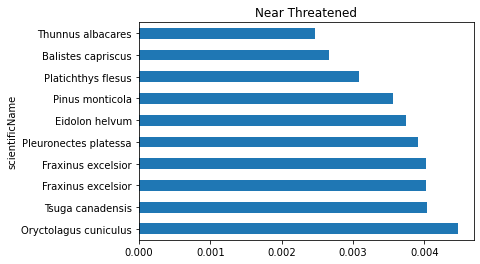

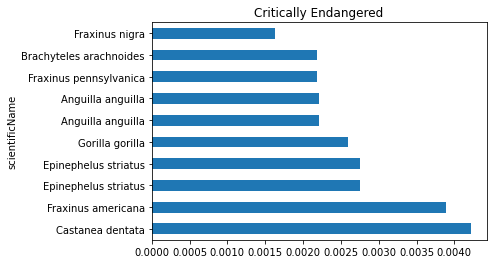

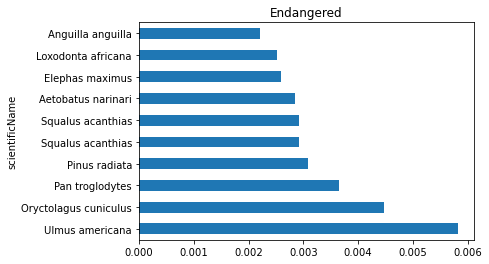

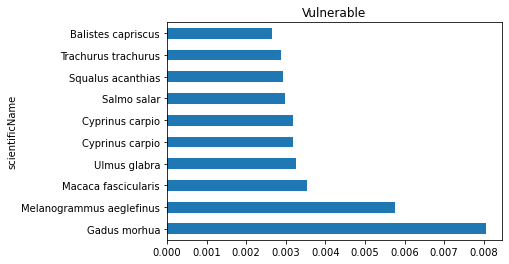

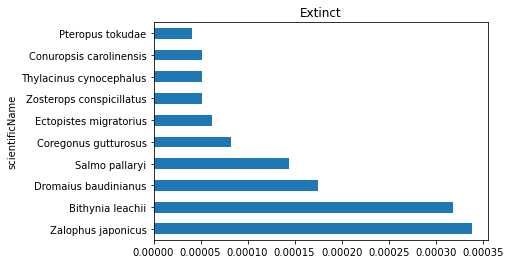

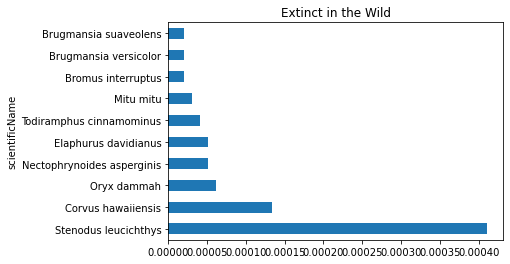

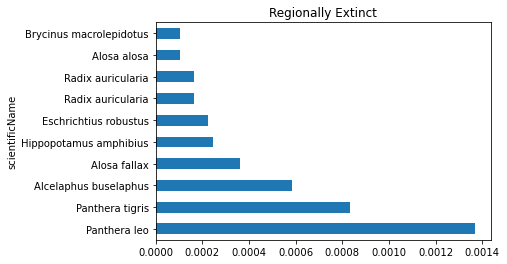

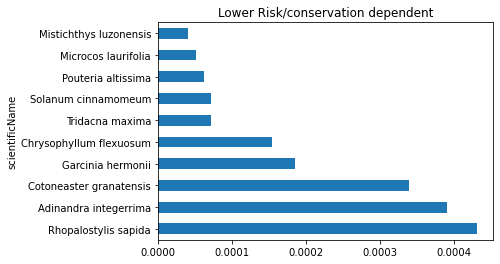

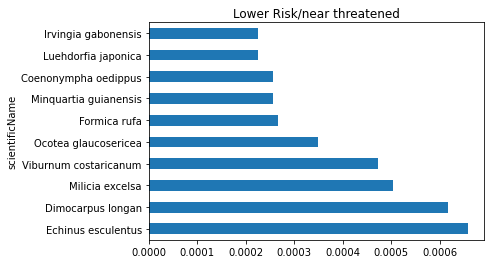

In [4]:
degree_df = pd.DataFrame.from_dict(nx.degree_centrality(G), orient='index', columns=['degree'])
degree_df = redlist_df.join(degree_df, on='scientificName').set_index('scientificName')

for category in degree_df.redlistCategory.unique():
    plt.figure()
    degree_df.query(f"redlistCategory == '{category}'").sort_values(by='degree', ascending=False)[:10].degree.plot.barh(title= f"{category}")

Para ter uma ideia mais clara da influência do grau de centralidade no nível de ameaça sofrida por uma espécie, foi calculada a correlação entre ambas as características. Para conseguir fazer esse cálculo, o primeiro passo foi converter as categorias para um valor capaz de indicar o nível de risco para aquela categoria. Assim, foram atribuidos valores de 0 até 8, onde quanto maior o valor, maior o risco enfrentado pela espécie. Como mostra o resultado abaixo, a correlação entre o grau e o risco é muito baixa.

In [5]:
risk_levels = {
    'Lower Risk/conservation dependent': 0, 
    'Lower Risk/near threatened': 1,
    'Near Threatened': 2,
    'Vulnerable': 3,
    'Endangered': 4,
    'Critically Endangered': 5,
    'Regionally Extinct': 6,
    'Extinct in the Wild': 7,
    'Extinct': 8
}

degree_df.redlistCategory = degree_df.redlistCategory.replace(risk_levels)
degree_df[['redlistCategory', 'degree']].corr().style.background_gradient(cmap='coolwarm')

,redlistCategory,degree
redlistCategory,1.000000,-0.029102
degree,-0.029102,1.000000


### Page Rank

Nesse ponto, foi utilizada a métrica de page rank como forma de medir a influência de uma determinada espécie no grafo de interações. Mais uma vez não foi possível observar um padrão claro de comportamento ao se observar diretamente a distribuição para cada uma das categorias. Por outro lado, comparado ao cenário anterior, os líderes para cada uma das categorias parecem estar em posição mais isolada em relação aos demais.

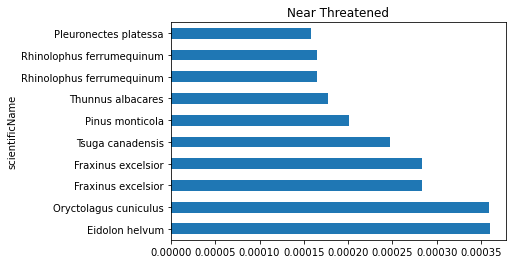

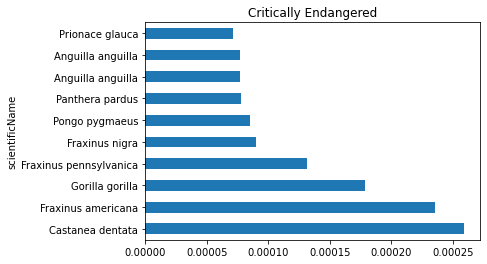

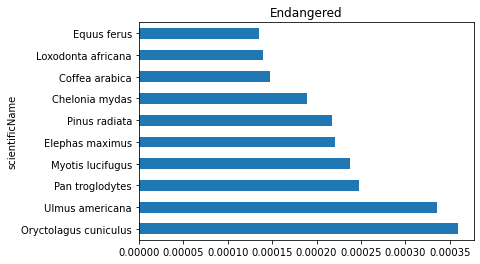

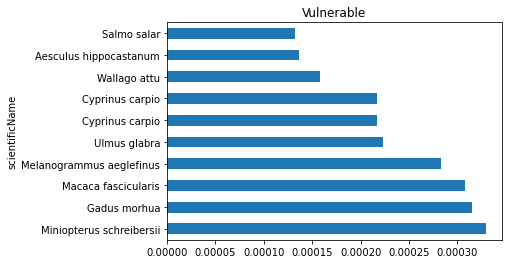

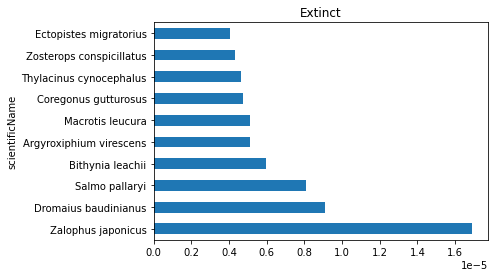

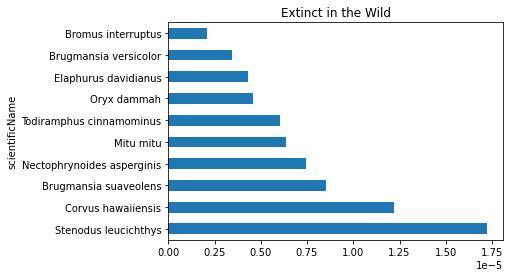

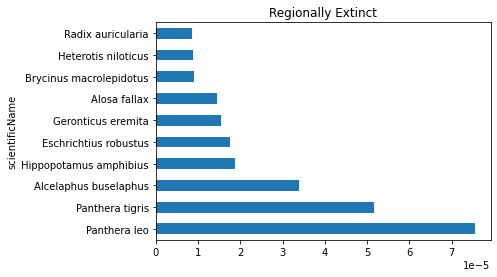

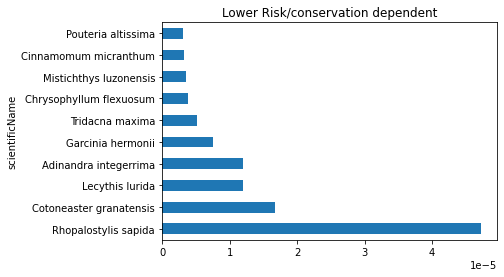

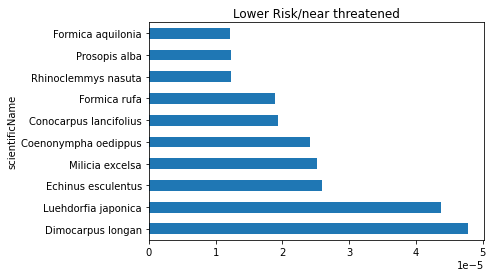

In [6]:
pagerank_df = pd.DataFrame.from_dict(nx.pagerank(G), orient='index', columns=['pagerank'])
pagerank_df = redlist_df.join(pagerank_df, on='scientificName').set_index('scientificName')

for category in pagerank_df.redlistCategory.unique():
    plt.figure()
    pagerank_df.query(f"redlistCategory == '{category}'").sort_values(by='pagerank', ascending=False)[:10].pagerank.plot.barh(title= f"{category}")

Avaliando as correlações mais uma vez, pode-se constatar o que já havia sido observado anteriormente: não há uma correlação entre as categorias e a influência calculada pelo page rank. Apesar da correlação ser maior do que a calculada para o grau, o valor resultante ainda é consideravelmente baixo.

In [7]:
risk_levels = {
    'Lower Risk/conservation dependent': 0, 
    'Lower Risk/near threatened': 1,
    'Near Threatened': 2,
    'Vulnerable': 3,
    'Endangered': 4,
    'Critically Endangered': 5,
    'Regionally Extinct': 6,
    'Extinct in the Wild': 7,
    'Extinct': 8
}

pagerank_df.redlistCategory = pagerank_df.redlistCategory.replace(risk_levels)
pagerank_df[['redlistCategory', 'pagerank']].corr().style.background_gradient(cmap='coolwarm')

,redlistCategory,pagerank
redlistCategory,1.000000,-0.031947
pagerank,-0.031947,1.000000


## Centralidade de autovetor

Por fim, foi testada a métrica de centralidade de autovetor, onde mais uma vez não é possível enxergar um padrão observando diretamente nas categorias. Como ponto de curiosidade, fica o fato da centralidade de espécies extintas ser inferior se comparadas às demais espécies. Já entre os criticamente em perigo, destaca-se a espécie `Brachyteles arachnoides`, também conhecido como Muriqui-do-sul, uma espécie de macaco encontrado na mata atlântica brasileira (entre Paraná, São Paulo, Minas Gerais, Rio de Janeiro e Espírito Santo). Um valor tão alto indica que a espécie apresenta uma grande importância em termos de interação, e o fato de ser uma espécie em situação tão crítica pode indicar que ela é uma forte candidata a ser uma espécie na qual é necessário se concentrar esforços de conservação em vista a proteger o maior número de espécies possível.

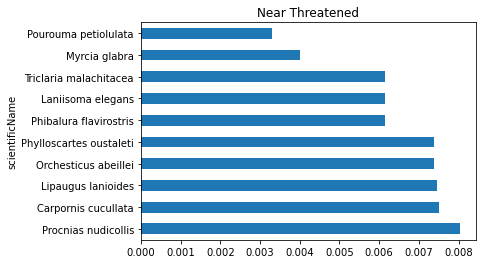

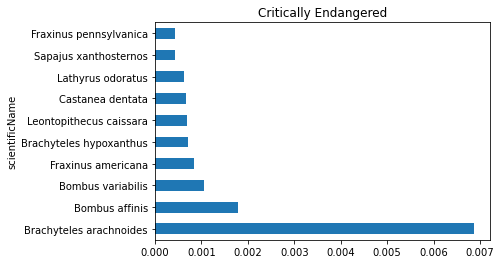

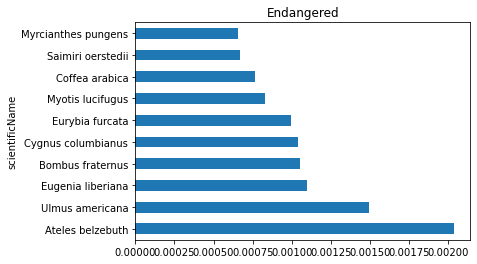

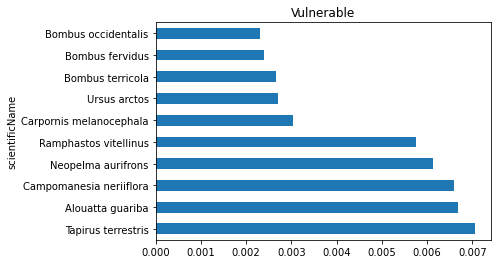

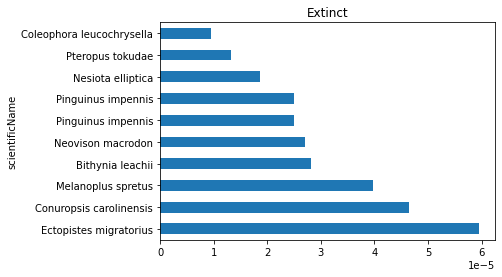

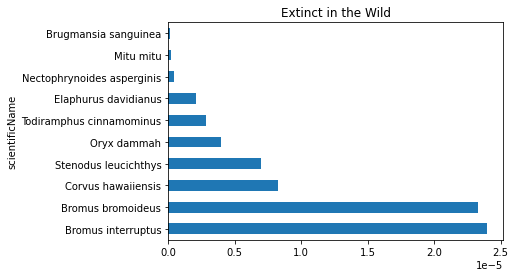

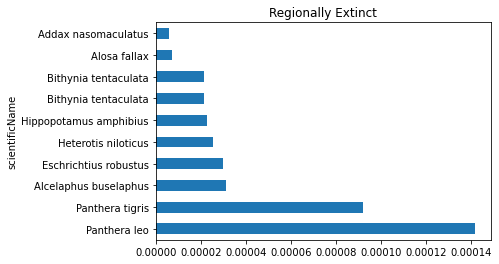

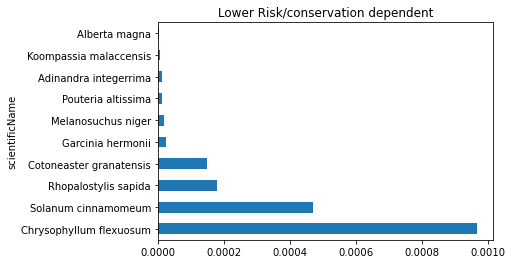

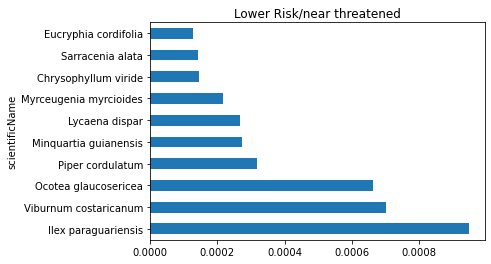

In [8]:
eigenvector_centrality_df = pd.DataFrame.from_dict(nx.eigenvector_centrality(G), orient='index', columns=['eigenvector_centrality'])
eigenvector_centrality_df = redlist_df.join(eigenvector_centrality_df, on='scientificName').set_index('scientificName')

for category in eigenvector_centrality_df.redlistCategory.unique():
    plt.figure()
    eigenvector_centrality_df.query(f"redlistCategory == '{category}'").sort_values(by='eigenvector_centrality', ascending=False)[:10].eigenvector_centrality.plot.barh(title= f"{category}")

Já observando a correlação, fica claro mais uma vez que essa métrica não possui influência no risco enfrentado por uma espécie.

In [9]:
risk_levels = {
    'Lower Risk/conservation dependent': 0, 
    'Lower Risk/near threatened': 1,
    'Near Threatened': 2,
    'Vulnerable': 3,
    'Endangered': 4,
    'Critically Endangered': 5,
    'Regionally Extinct': 6,
    'Extinct in the Wild': 7,
    'Extinct': 8
}

eigenvector_centrality_df.redlistCategory = eigenvector_centrality_df.redlistCategory.replace(risk_levels)
eigenvector_centrality_df[['redlistCategory', 'eigenvector_centrality']].corr().style.background_gradient(cmap='coolwarm')

,redlistCategory,eigenvector_centrality
redlistCategory,1.000000,-0.057960
eigenvector_centrality,-0.057960,1.000000


## Clusterização

Para analisar os efeitos da clusterização, foi utilizado o software `Gephi`. Para facilitar essa computação, o grafo foi limitado somente às interações onde uma espécie se alimenta da outra, em uma rede de interações mais próxima do que é observado em uma cadeia alimentar. Neste grafo, foi aplicado o algoritmo de Leiden para identificar os clusters de interações, onde o resultado pode ser visto no arquivo `04 - Pesquisa/imagens/interaction-eats.pdf`. O algoritmo de Girvan-Newman foi testado, porém, apesar de ser mais famoso, a carga computacional para um grafo desse tamanho impossibilitou os testes.

In [10]:
clusters_df = pd.read_csv('interaction-eats-clusters.csv')[['Id', 'Cluster']]
clusters_df

,Id,Cluster
0,Trigona laeviceps,0
1,Homo sapiens,0
2,Lisotrigona cacciae,0
3,Canis lupus,0
4,Lisotrigona furva,0
...,...,...
48284,Mouse sapelovirus M-58/USA/2008,1
48285,Tembusu virus,1
48286,Paratrytone melane,0
48287,Nipah henipavirus,0


Como pode ser visto na figura citada, as espécies foram divididas basicamente em dois grupos. Foram encontrados alguns clusters menores, porém a maioria contava com apenas 2 espécies, com alguns poucos grupos apresentando 4 espécies. O gráfico abaixo apresenta essa distribuição, onde os grupos 0 e 1 cobrem pouco mais de 93% das espécies contidas no grafo.

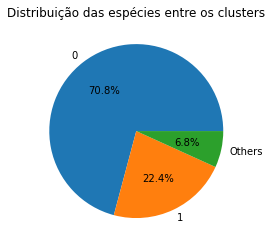

In [11]:
def pie_plot_others(title, series, agg_after):
    others_row = pd.Series({'Others': series[agg_after:].sum()})
    plot_df = pd.concat([series[:agg_after], others_row])
    plot_df.plot.pie(title=title, autopct='%1.1f%%', ylabel='')    

pie_plot_others("Distribuição das espécies entre os clusters", clusters_df.Cluster.value_counts(), 2)

A seguir, foi analisado se os agrupamentos encontrados apresentam alguma relação com o risco de extinção enfrentado por uma determinada espécie. No entanto, como mostram os gráficos abaixo, a distribuição das categorias entre os dois principais agrupamentos encontrados foi muito semelhante. Além disso, não é possível observar nenhuma liderança clara para uma determinada categoria dentro dos grupos.

In [12]:
clusters_df = redlist_df.join(clusters_df.set_index('Id'), on='scientificName')
clusters_df

,Unnamed: 0,scientificName,redlistCategory,populationTrend,systems,realm,possiblyExtinct,possiblyExtinctInTheWild,longitude,latitude,Cluster
0,0,Hexanchus griseus,Near Threatened,Decreasing,Marine,NaN,False,False,NaN,NaN,1.0
1,1,Heosemys annandalii,Critically Endangered,Decreasing,Terrestrial|Freshwater (=Inland waters),Indomalayan,False,False,NaN,NaN,NaN
2,2,Hubbsina turneri,Critically Endangered,Decreasing,Freshwater (=Inland waters),Neotropical,False,False,"[-101.4795, -101.7773, -101.7876]","[19.8745, 19.8256, 19.8273]",NaN
3,3,Hungerfordia pelewensis,Endangered,Unknown,Terrestrial,Oceanian,False,False,NaN,NaN,NaN
4,4,Ictalurus mexicanus,Vulnerable,Unknown,Freshwater (=Inland waters),Neotropical,False,False,"[-99.35417, -99.3]","[21.98083, 22.0]",NaN
...,...,...,...,...,...,...,...,...,...,...,...
50245,50245,Filicium thouarsianum,Near Threatened,Decreasing,Terrestrial,Afrotropical,False,False,"[49.13333, 49.066667, 49.13333, 49.13333, 47.7...","[-18.81666, -18.866667, -18.81666, -18.81666, ...",NaN
50246,50246,Melanophylla angustior,Endangered,Decreasing,Terrestrial,Afrotropical,False,False,"[47.72611, 47.7322]","[-23.01306, -23.0219]",NaN
50247,50247,Melanophylla madagascariensis,Endangered,Decreasing,Terrestrial,Afrotropical,False,False,"[49.2001111, 49.20305, 49.20333, 49.20388, 49....","[-17.9206389, -17.93194, -17.93194, -17.92944,...",NaN
50248,50248,Melanophylla modestei,Endangered,Decreasing,Terrestrial,Afrotropical,False,False,"[49.98333, 49.975, 49.975, 49.96666, 49.966667...","[-15.63333, -15.625, -15.625, -15.63333, -15.6...",NaN


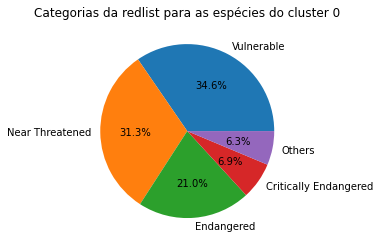

In [13]:
pie_plot_others("Categorias da redlist para as espécies do cluster 0", clusters_df.query("Cluster == 0")['redlistCategory'].value_counts(), 4)

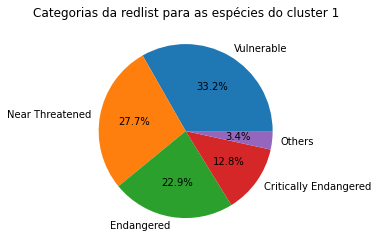

In [14]:
pie_plot_others("Categorias da redlist para as espécies do cluster 1", clusters_df.query("Cluster == 1")['redlistCategory'].value_counts(), 4)

Aproveitando os agrupamentos obtidos, foi verificado se as espécies que fazem parte de um mesmo agrupamento também compartilham tendências semelhantes de crescimento. Como mostram os gráficos abaixo, há uma parcela maior de espécies em situação desconhecida para o agrupamento 1, enquanto para o agrupamento 0 há uma quantidade maior de espécies com a população em queda.

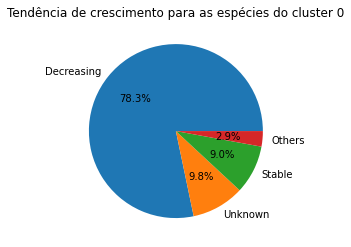

In [15]:
pie_plot_others("Tendência de crescimento para as espécies do cluster 0", clusters_df.query("Cluster == 0")['populationTrend'].value_counts(), 3)

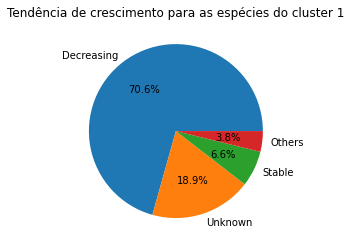

In [16]:
pie_plot_others("Tendência de crescimento para as espécies do cluster 1", clusters_df.query("Cluster == 1")['populationTrend'].value_counts(), 3)

Ainda considerando os agrupamentos obtidos, foi observado se há um padrão na localização geográfica entre os dois principais agrupamentos observados. Para o agrupamento 0, é possível perceber que há espécies espalhadas por diversas regiões do mundo. No entanto, para o agrupamento 1 há uma surpresa, as espécies se concentram em 3 diferentes regiões. A primeira delas fica no México, espalhadas entre a Cidade do México e Cancún. A segunda fica localizada na África, separada entre os países de Uganda e Malawi. Por fim, a terceira fica localizada na Indonésia. Entre essas três regiões, o que há de comum é uma faixa mais central de latitude, o que pode indicar uma influência do clima mais quente encontrada nessa faixa do mundo.

In [17]:
import folium
from folium.plugins import HeatMap

map = folium.Map()

points = []
for _, row in clusters_df.query("Cluster == 0").dropna(subset=['latitude', 'longitude']).iterrows():
    for lat, long in zip(eval(row['latitude']), eval(row['longitude'])):
        points.append([lat, long])

HeatMap(points).add_to(map)
map

In [18]:
map = folium.Map()

points = []
for _, row in clusters_df.query("Cluster == 1").dropna(subset=['latitude', 'longitude']).iterrows():
    for lat, long in zip(eval(row['latitude']), eval(row['longitude'])):
        points.append([lat, long])

HeatMap(points).add_to(map)
map